We will plot a invariant mass distribution from a LHE input file.

First, some basic imports.

In [1]:
import math

import hist

import pylhe

# we'll use an example data also used for testing
from skhep_testdata import data_path

lhe_file = data_path("pylhe-drell-yan-ll-lhe.gz")

Prepare a histogram and a function to calculate the invariant mass of two particles.

In [2]:
h = hist.Hist.new.Reg(30, 50, 150).Int64()

Use the generator provided by pylhe to read the events.

In [3]:
events = pylhe.to_awkward(pylhe.read_lhe_with_attributes(lhe_file))
h.fill((events.particles.vector[:,-1] + events.particles.vector[:,-2]).mass, weight=events.eventinfo.weight)
h

Hist(Regular(30, 50, 150, label='Axis 0'), storage=Int64()) # Sum: 13189080.0 (16780000.0 with flow)

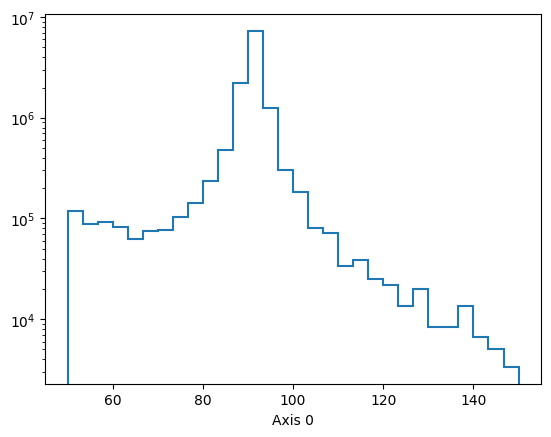

In [4]:
a = h.plot1d()
a[0].stairs.axes.set_yscale("log")

`pylhe` also has helpful graph representation of events so you can view what the LHE events you are studying look like.

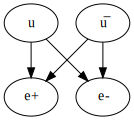

In [5]:
events = pylhe.read_lhe(lhe_file)
e = next(events)
e

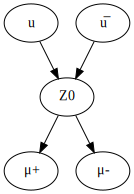

In [6]:
e = next(events)
e

You can also render these graphs into a PDF file.

In [7]:
e.graph.render(filename='z0-event', format='pdf', cleanup=True)

'z0-event.pdf'